In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
newData = pd.DataFrame(data)

In [6]:
newData.columns = newData.columns.str.replace(' ', '_')
newData.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
kMeans_test_1 = newData[['total_sulfur_dioxide', 'pH']]

In [8]:
kMeans_test_1.head()

,total_sulfur_dioxide,pH
0,34.0,3.51
1,67.0,3.20
2,54.0,3.26
3,60.0,3.16
4,34.0,3.51


In [9]:
x_kMeans_test_1 = kMeans_test_1.iloc[:, 0:2].values
x_kMeans_test_1

array([[34.  ,  3.51],
       [67.  ,  3.2 ],
       [54.  ,  3.26],
       ...,
       [40.  ,  3.42],
       [44.  ,  3.57],
       [42.  ,  3.39]])

In [10]:
from sklearn.cluster import KMeans
wcss_1 = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x_kMeans_test_1)
    wcss_1.append(kmeans.inertia_)

In [11]:
wcss_1

[1729237.6799255782,
 559286.615993384,
 288990.2022603881,
 182638.01612191228,
 126629.23673028949,
 84731.17106149555,
 58284.853387374285,
 42872.49485634161,
 32668.874903045908,
 26831.634863860756]

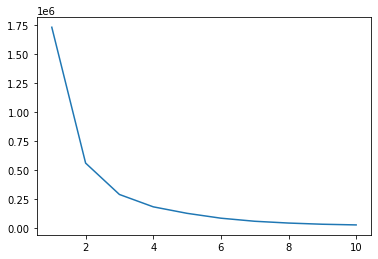

In [12]:
plt.plot(range(1, 11), wcss_1)

In [13]:
kmeans_1 = KMeans(n_clusters=3, init='k-means++')
y_kmeans_1 = kmeans_1.fit_predict(x_kMeans_test_1)

In [14]:
y_kmeans_1

array([1, 0, 0, ..., 0, 0, 0])

In [16]:
pd.concat([kMeans_test_1, pd.DataFrame(y_kmeans_1)], axis=1)

,total_sulfur_dioxide,pH,0
0,34.0,3.51,1
1,67.0,3.20,0
2,54.0,3.26,0
3,60.0,3.16,0
4,34.0,3.51,1
...,...,...,...
1594,44.0,3.45,0
1595,51.0,3.52,0
1596,40.0,3.42,0
1597,44.0,3.57,0


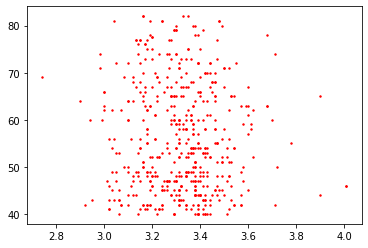

In [17]:
plt.scatter(x_kMeans_test_1[y_kmeans_1==0, 1], x_kMeans_test_1[y_kmeans_1==0, 0], s=2, c='red')


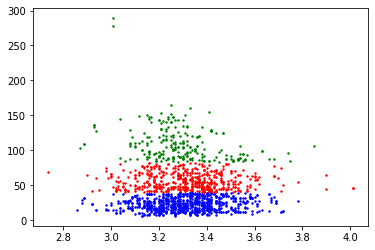

In [18]:
plt.scatter(x_kMeans_test_1[y_kmeans_1==0, 1], x_kMeans_test_1[y_kmeans_1==0, 0], s=2, c='red')
plt.scatter(x_kMeans_test_1[y_kmeans_1==1, 1], x_kMeans_test_1[y_kmeans_1==1, 0], s=2, c='blue')
plt.scatter(x_kMeans_test_1[y_kmeans_1==2, 1], x_kMeans_test_1[y_kmeans_1==2, 0], s=2, c='green')

In [19]:
hierarchical_test_1 = newData[['total_sulfur_dioxide', 'pH']]

In [20]:
hierarchical_test_1.head()

,total_sulfur_dioxide,pH
0,34.0,3.51
1,67.0,3.20
2,54.0,3.26
3,60.0,3.16
4,34.0,3.51


In [21]:
x_hierarchical_test_1 = hierarchical_test_1.iloc[:, 0:2].values

In [22]:
import scipy.cluster.hierarchy as sch

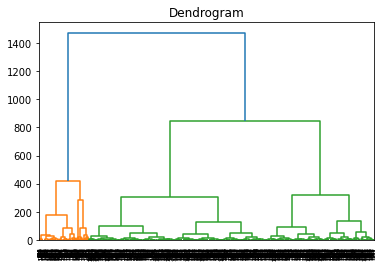

In [23]:
dendrogrm_1 = sch.dendrogram(sch.linkage(x_hierarchical_test_1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

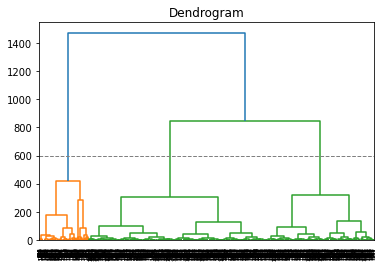

In [24]:
dendrogrm_1 = sch.dendrogram(sch.linkage(x_hierarchical_test_1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('')
plt.axhline(y=600, c='grey', lw=1, linestyle='dashed')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x_hierarchical_test_1)

In [26]:
pd.concat([kMeans_test_1, pd.DataFrame(y_hc)], axis=1)

,total_sulfur_dioxide,pH,0
0,34.0,3.51,2
1,67.0,3.20,1
2,54.0,3.26,1
3,60.0,3.16,1
4,34.0,3.51,2
...,...,...,...
1594,44.0,3.45,1
1595,51.0,3.52,1
1596,40.0,3.42,1
1597,44.0,3.57,1


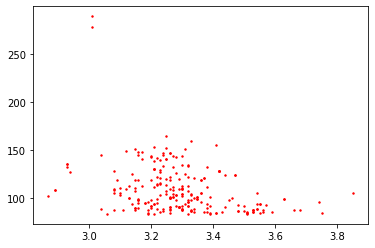

In [27]:
plt.scatter(x_hierarchical_test_1[y_hc == 0, 1], x_hierarchical_test_1[y_hc == 0, 0], s = 2, c = 'red', label = '')

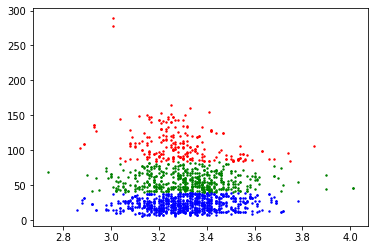

In [29]:
plt.scatter(x_hierarchical_test_1[y_hc == 0, 1], x_hierarchical_test_1[y_hc == 0, 0], s = 2, c = 'red', label = '')
plt.scatter(x_hierarchical_test_1[y_hc == 1, 1], x_hierarchical_test_1[y_hc == 1, 0], s = 2, c = 'green', label = '')
plt.scatter(x_hierarchical_test_1[y_hc == 2, 1], x_hierarchical_test_1[y_hc == 2, 0], s = 2, c = 'blue', label = '')

In [30]:
kMeans_test_2 = newData[['residual_sugar', 'chlorides']]

In [31]:
kMeans_test_2.head()

,residual_sugar,chlorides
0,1.9,0.076
1,2.6,0.098
2,2.3,0.092
3,1.9,0.075
4,1.9,0.076


In [32]:
x_kMeans_test_2 = kMeans_test_2.iloc[:, 0:2].values
x_kMeans_test_2

array([[1.9  , 0.076],
       [2.6  , 0.098],
       [2.3  , 0.092],
       ...,
       [2.3  , 0.076],
       [2.   , 0.075],
       [3.6  , 0.067]])

In [33]:
from sklearn.cluster import KMeans
wcss_2 = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x_kMeans_test_2)
    wcss_2.append(kmeans.inertia_)

In [34]:
wcss_2

[3180.1994164715447,
 1152.452132446341,
 599.5525784528677,
 351.42342129073165,
 222.25186874609795,
 149.40978544751806,
 108.65853221685575,
 89.0440216573258,
 68.52338245659394,
 57.610424179578025]

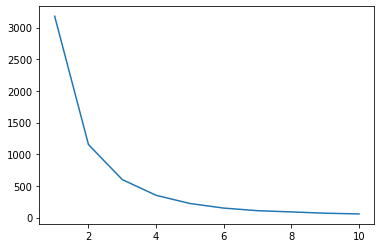

In [35]:
plt.plot(range(1, 11), wcss_2)

In [36]:
kmeans_2 = KMeans(n_clusters=3, init='k-means++')
y_kmeans_2 = kmeans_2.fit_predict(x_kMeans_test_2)

In [37]:
y_kmeans_2

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
pd.concat([kMeans_test_2, pd.DataFrame(y_kmeans_2)], axis=1)

,residual_sugar,chlorides,0
0,1.9,0.076,1
1,2.6,0.098,1
2,2.3,0.092,1
3,1.9,0.075,1
4,1.9,0.076,1
...,...,...,...
1594,2.0,0.090,1
1595,2.2,0.062,1
1596,2.3,0.076,1
1597,2.0,0.075,1


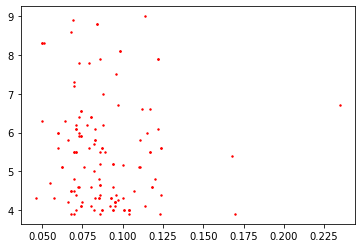

In [40]:
plt.scatter(x_kMeans_test_2[y_kmeans_2==0, 1], x_kMeans_test_2[y_kmeans_2==0, 0], s=2, c='red')

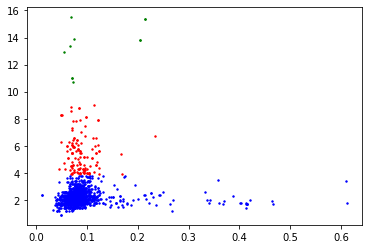

In [41]:
plt.scatter(x_kMeans_test_2[y_kmeans_2==0, 1], x_kMeans_test_2[y_kmeans_2==0, 0], s=2, c='red')
plt.scatter(x_kMeans_test_2[y_kmeans_2==1, 1], x_kMeans_test_2[y_kmeans_2==1, 0], s=2, c='blue')
plt.scatter(x_kMeans_test_2[y_kmeans_2==2, 1], x_kMeans_test_2[y_kmeans_2==2, 0], s=2, c='green')

In [42]:
hierarchical_test_2 = newData[['residual_sugar', 'chlorides']]

In [43]:
hierarchical_test_2.head()

,residual_sugar,chlorides
0,1.9,0.076
1,2.6,0.098
2,2.3,0.092
3,1.9,0.075
4,1.9,0.076


In [44]:
x_hierarchical_test_2 = hierarchical_test_2.iloc[:, 0:2].values

In [45]:
import scipy.cluster.hierarchy as sch

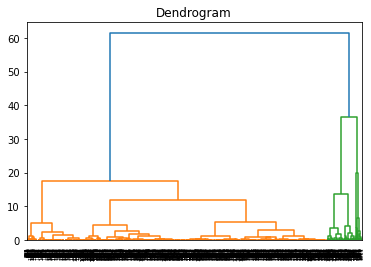

In [46]:
dendrogrm_1 = sch.dendrogram(sch.linkage(x_hierarchical_test_2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

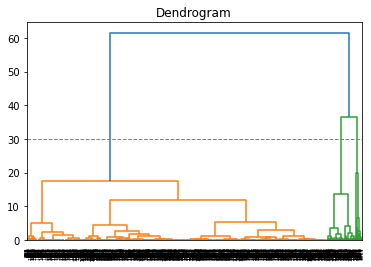

In [47]:
dendrogrm_2 = sch.dendrogram(sch.linkage(x_hierarchical_test_2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('')
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')

In [48]:
from sklearn.cluster import AgglomerativeClustering
hc_2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc_2 = hc_2.fit_predict(x_hierarchical_test_2)

In [49]:
pd.concat([hierarchical_test_2, pd.DataFrame(y_hc_2)], axis=1)

,residual_sugar,chlorides,0
0,1.9,0.076,1
1,2.6,0.098,1
2,2.3,0.092,1
3,1.9,0.075,1
4,1.9,0.076,1
...,...,...,...
1594,2.0,0.090,1
1595,2.2,0.062,1
1596,2.3,0.076,1
1597,2.0,0.075,1


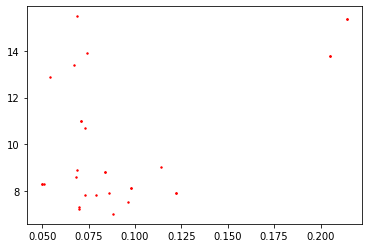

In [50]:
plt.scatter(x_hierarchical_test_2[y_hc_2 == 0, 1], x_hierarchical_test_2[y_hc_2 == 0, 0], s = 2, c = 'red', label = '')

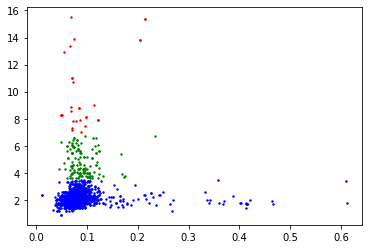

In [51]:
plt.scatter(x_hierarchical_test_2[y_hc_2 == 0, 1], x_hierarchical_test_2[y_hc_2 == 0, 0], s = 2, c = 'red', label = '')
plt.scatter(x_hierarchical_test_2[y_hc_2 == 1, 1], x_hierarchical_test_2[y_hc_2 == 1, 0], s = 2, c = 'blue', label = '')
plt.scatter(x_hierarchical_test_2[y_hc_2 == 2, 1], x_hierarchical_test_2[y_hc_2 == 2, 0], s = 2, c = 'green', label = '')